In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# read csv from drive
import numpy as np
import pandas as pd
import io
import csv
import matplotlib.pyplot as plt

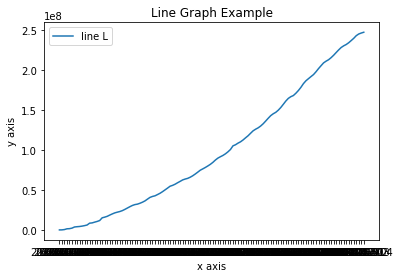

In [ ]:
# read


# # of people get vaccinated
data_path = "/content/drive/My Drive/CS229 Project/United States.csv"
US_vaccined = pd.read_csv(data_path)
# print(US_vaccined)
# United states:
# ['location', 'date', 'vaccine', 'source_url', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']
total_vc = US_vaccined[US_vaccined.keys()[4]].to_numpy()
date = US_vaccined[US_vaccined.keys()[1]]
US_vaccined.keys()[1]
# print(total_vc) 

plt.plot(date, total_vc, label="line L")
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()


In [ ]:
# # VAERS
## give vaers_id to identify the patient, give corresponding COVID vaccine type
################################################################################
## Vaers_covid19_id - id of all patient with covid vaccination
## Vaers_covid19_vac - corresponding vaccine type
## Unknown - 0; Moderna - 1; Pfizer - 2
###############################################################################

data_path = "/content/drive/My Drive/CS229 Project/2020VAERSData/2020VAERSVAX.csv"
vaers_data = pd.read_csv(data_path)
# keys: ['VAERS_ID', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES','VAX_ROUTE', 'VAX_SITE', 'VAX_NAME']
# print(vaers_data)
# find id and vaccine type, vaccine name to list
Vaers_id = vaers_data[vaers_data.keys()[0]].to_list()
Vaers_vac_type = vaers_data[vaers_data.keys()[1]].to_list()
Vaers_vac_name = vaers_data[vaers_data.keys()[7]].to_list()

# only store the covid19 vaccine data
# index of all covid19 vaccinations
covid19_indx = [i for i, x in enumerate(Vaers_vac_type) if x == "COVID19"]
print(Vaers_vac_type[covid19_indx])

# print(covid19_indx)
# ID of all patient with covid 19 vaccinations
Vaers_covid19_id = [Vaers_id[i] for i in covid19_indx]
# print(Vaers_covid19_id)
Vaers_covid19_vac_name = [Vaers_vac_name[i] for i in covid19_indx]
# print(Vaers_covid19_vac_name)
# Unknown - 0; Moderna - 1; Pfizer - 2
Vaers_covid19_vac = []
for i in range(len(Vaers_covid19_vac_name)):
  if Vaers_covid19_vac_name[i] == 'COVID19 (COVID19 (UNKNOWN))':
    Vaers_covid19_vac.append(0)
  elif Vaers_covid19_vac_name[i] == 'COVID19 (COVID19 (MODERNA))':
    Vaers_covid19_vac.append(1)
  elif Vaers_covid19_vac_name[i] == 'COVID19 (COVID19 (PFIZER-BIONTECH))':
    Vaers_covid19_vac.append(2)

# print(Vaers_covid19_vac)
Vaers_id = vaers_data[vaers_data.keys()[0]].to_list()

TypeError: ignored

In [ ]:
data_path = "/content/drive/My Drive/CS229 Project/2020VAERSData/2020VAERSVAX.csv"
vaers_data = pd.read_csv(data_path)
# keys: ['VAERS_ID', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES','VAX_ROUTE', 'VAX_SITE', 'VAX_NAME']
# print(vaers_data)
# find id and vaccine type, vaccine name to list
Vaers_id = vaers_data[vaers_data.keys()[0]].to_list()
Vaers_vac_type = vaers_data[vaers_data.keys()[1]].to_list()
Vaers_vac_name = vaers_data[vaers_data.keys()[7]].to_list()

# only store the covid19 vaccine data
# index of all covid19 vaccinations
covid19_indx = [i for i, x in enumerate(Vaers_vac_type) if x == "COVID19"]
print(Vaers_id[covid19_indx[0]])

902418


In [ ]:
print(len(covid19_indx))

10880


In [ ]:
############################################################################
## side_effects - np array, # of patients * 5 (# of symptoms)
## each symptoms has been a key in symptom_dict
## elements in side_effects are the corresponding symptom dictionary value
############################################################################ 

data_path = "/content/drive/My Drive/CS229 Project/2020VAERSData/2020VAERSSYMPTOMS.csv"
vaers_data = pd.read_csv(data_path)
# keys ['VAERS_ID', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5']
# print(vaers_data.keys())
# all ids
Vaers_id = vaers_data[vaers_data.keys()[0]].to_list()
# find index that corresponding to the vaers covid id
covid19_indx = []
for i in range(len(Vaers_covid19_id)):
  covid19_indx.append(Vaers_id.index(Vaers_covid19_id[i]))

# print(covid19_indx)

#get all symptoms and make dictionary
symptom_list = []
symptom_list.extend(vaers_data[vaers_data.keys()[1]].to_list())
symptom_list.extend(vaers_data[vaers_data.keys()[3]].to_list())
symptom_list.extend(vaers_data[vaers_data.keys()[5]].to_list())
symptom_list.extend(vaers_data[vaers_data.keys()[7]].to_list())
symptom_list.extend(vaers_data[vaers_data.keys()[9]].to_list())
# unique sympton list
u_symptom_list = list(set(symptom_list))
# symptom dictionary
symptom_dict = {u_symptom_list[i]: i for i in range(len(u_symptom_list))}

#generate nd array that describe each patient's symptom (len(list_covid19_indx),5)
#number of each element is the corresponding symptom value
side_effects = np.zeros([len(covid19_indx), 5])
for i in range(len(covid19_indx)):
  for j in range(5):
    side_effects[i, j] = symptom_dict.get(vaers_data[vaers_data.keys()[2*j+1]].to_list()[i])


NameError: ignored

In [ ]:
print(len(u_symptom_list))

4017


In [3]:
# import all data from 2021
data_path = "/content/drive/My Drive/CS229 Project/2021vaers.csv"
vaers_data = pd.read_csv(data_path)
# print(vaers_data.keys())
# keys : ['VAERS_ID', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
#        'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'RECVDATE', 'STATE', 
#        'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX', 'RPT_DATE',
#        'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
#        'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD',
#        'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 
#        'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 
#        'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 
#        'ER_ED_VISIT', 'ALLERGIES', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2', 
#        'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4', 'SYMPTOMVERSION4', 
#        'SYMPTOM5', 'SYMPTOMVERSION5']

############# symptom dictionary ###################

#get all symptoms and make dictionary
symptom_list = []
symptom_list.extend(vaers_data[vaers_data.keys()[42]].to_list())
symptom_list.extend(vaers_data[vaers_data.keys()[44]].to_list())
symptom_list.extend(vaers_data[vaers_data.keys()[46]].to_list())
symptom_list.extend(vaers_data[vaers_data.keys()[48]].to_list())
symptom_list.extend(vaers_data[vaers_data.keys()[50]].to_list())
# unique sympton list
u_symptom_list = list(set(symptom_list))
# symptom dictionary
symptom_dict = {u_symptom_list[i]: i for i in range(len(u_symptom_list))}

num_symptom = len(u_symptom_list)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,19,30,38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#get vaers_id
Vaers_id = vaers_data[vaers_data.keys()[0]].to_list()
unique_id = list(set(Vaers_id))

# get days in hospitcal
Vaers_hostday = vaers_data[vaers_data.keys()[21]].to_list()
# get symptom status
Vaers_symptom_1 = vaers_data[vaers_data.keys()[42]].to_list()
Vaers_symptom_2 = vaers_data[vaers_data.keys()[44]].to_list()
Vaers_symptom_3 = vaers_data[vaers_data.keys()[46]].to_list()
Vaers_symptom_4 = vaers_data[vaers_data.keys()[48]].to_list()
Vaers_symptom_5 = vaers_data[vaers_data.keys()[50]].to_list()


# list of hospitalized days
hospitalized_status = []
# list of symptom index for each patient - according to symptom dictionary
symptom_status = []
for i in range(len(unique_id)):
  print(i)
  # get id
  temp_id = unique_id[i]
  # find index of Vaers_id that gives the same id
  ind_id = [i for i, x in enumerate(Vaers_id) if x == temp_id]
  # find symptom
  t_symptom = []
  # hospital days
  hospital_day = 0
  for j in range(len(ind_id)):
    # symptoms
    t_symptom.append(Vaers_symptom_1[ind_id[j]])
    t_symptom.append(Vaers_symptom_2[ind_id[j]])
    t_symptom.append(Vaers_symptom_3[ind_id[j]])
    t_symptom.append(Vaers_symptom_4[ind_id[j]])
    t_symptom.append(Vaers_symptom_5[ind_id[j]])
    # days in hospital
    t_hostday = Vaers_hostday[ind_id[j]]
    if t_hostday == 'nan':
      hospital_day = max(hospital_day ,0)
    else:
      hospital_day = max(hospital_day ,t_hostday)
  # number of days hospitalized
  hospitalized_status.append(hospital_day)
  # symptom list
  unique_symptom = list(set(t_symptom))
  symptom_idx = np.zeros([len(unique_symptom), ])
  for k in range(len(unique_symptom)):
    symptom_idx[k] = symptom_dict.get(unique_symptom[k])
  symptom_status.append(symptom_idx)



Streaming output truncated to the last 5000 lines.
102882
102883
102884
102885
102886
102887
102888
102889
102890
102891
102892
102893
102894
102895
102896
102897
102898
102899
102900
102901
102902
102903
102904
102905
102906
102907
102908
102909
102910
102911
102912
102913
102914
102915
102916
102917
102918
102919
102920
102921
102922
102923
102924
102925
102926
102927
102928
102929
102930
102931
102932
102933
102934
102935
102936
102937
102938
102939
102940
102941
102942
102943
102944
102945
102946
102947
102948
102949
102950
102951
102952
102953
102954
102955
102956
102957
102958
102959
102960
102961
102962
102963
102964
102965
102966
102967
102968
102969
102970
102971
102972
102973
102974
102975
102976
102977
102978
102979
102980
102981
102982
102983
102984
102985
102986
102987
102988
102989
102990
102991
102992
102993
102994
102995
102996
102997
102998
102999
103000
103001
103002
103003
103004
103005
103006
103007
103008
103009
103010
103011
103012
103013
103014
103015
103016
1030

In [5]:
# total number of data 
num_total = len(unique_id)
# number of theta dimension
theta_dim = len(u_symptom_list) + 1  # with intercept
# split to train and test data
# train data: 80000
# test data: 27882
num_train = 80000
num_test = 27882

import random

# set number of hospitalized date as np array
num_hospitalized_day = np.array(hospitalized_status)
# split to train and test
train_num_hospitalized_day = num_hospitalized_day[0:num_train]
test_num_hospitalized_day = num_hospitalized_day[num_train: num_train+num_test]

# split symptom list to train and test
train_symptoms = symptom_status[0:num_train]
test_symptoms = symptom_status[num_train: num_train+num_test]

In [14]:
def linear_sparse_train(symptom, hostday, num_dim, n_train, batch_size = 40, reg_lambda = 0.01, learning_rate = 0.00001, max_iter = 1000):
  # symptom - list of array of symptom index
  # hostday - list of number of hospitalized day
  # num_dim - theta dimension
  # batch_size
  # n_train - number of training sample
  # reg_lambda - an l1 norm regularization for sparse constraint

  # initialize theta
  theta = np.random.normal(size=[num_dim, ])
  # theta = np.zeros([num_dim, ])

  # number of batches:
  n_batch = int(n_train / batch_size)

  i = 0
  # iteration
  while True:
    i += 1
    print(i)
    # randomly get index to set batch 
    ind_train = list(range(n_train))
    random.shuffle(ind_train)
    # iterate
    old_theta = theta
    for j in range(n_batch):
      t_theta = np.zeros([num_dim, ])
      for k in range(batch_size):
        # generate x data
        t_symptom = symptom[j*batch_size + k]
        symptom_array = (np.array(t_symptom)).astype('int')
        train_x = np.zeros([num_dim, ])
        train_x[symptom_array] = 1
        train_x[-1] = 1
    
        # generate y data
        train_y = hostday[j*batch_size + k]

        # update theta
        grad = (theta.T.dot(train_x) - train_y) * theta + reg_lambda * np.sign(theta)
        t_theta -= grad
        
      t_theta /= batch_size
      # print(np.linalg.norm(t_theta))
      # update theta
      theta = theta + learning_rate * t_theta
      # print(np.linalg.norm(theta - old_theta))
    print(theta)
    if np.linalg.norm(old_theta - theta) < 1e-6:
      print(np.linalg.norm(old_theta - theta))
      return theta
    if i > max_iter:
      return theta


In [7]:
def predict_hostday(symptom, theta):
  # symptom - list of array of symptom index
  # theta - linear regression parameter
  n_pred = len(symptom)
  n_dim = theta.shape[0]

  # prediction date
  num_hostday = np.zeros([n_pred, ])

  # compute each num_hostday
  for i in range(n_pred):
    t_symptom = symptom[i]
    symptom_array = (np.array(t_symptom)).astype('int')
    test_x = np.zeros([n_dim, ])
    test_x[symptom_array] = 1
    test_x[-1] = 1

    # predict
    num_hostday[i] = theta.T.dot(test_x)
  
  return num_hostday

In [8]:
def get_accuracy(hostday_pred, hostday_true):
  num_pred = hostday_pred.shape[0]
  zero_hostday = hostday_true[hostday_true == 0]
  num_zero_day = zero_hostday.shape[0]
  total_norm = np.linalg.norm(hostday_pred - hostday_true) 
  return [total_norm / (num_pred - num_zero_day), total_norm / num_pred]


## **experiment 1**

In [ ]:
# train
lin_theta = linear_sparse_train(train_symptoms, train_num_hospitalized_day, theta_dim, num_train, max_iter=200)

1
[ 0.63925863  1.14352846 -0.18304594 ...  1.02381538  1.37242481
  0.63039731]
2
[ 0.62362741  1.11572254 -0.17842917 ...  0.99889972  1.33909259
  0.61498003]
3
[ 0.60879388  1.08933996 -0.17404407 ...  0.97525887  1.30746771
  0.60034946]
4
[ 0.59469833  1.06427417 -0.16987329 ...  0.95279741  1.27742235
  0.58644668]
5
[ 0.58128685  1.04042899 -0.16590116 ...  0.93142917  1.24884114
  0.57321854]
6
[ 0.56851065  1.01771739 -0.16211352 ...  0.91107622  1.22161969
  0.56061693]
7
[ 0.55632548  0.9960604  -0.1584975  ...  0.89166784  1.19566329
  0.54859821]
8
[ 0.54469111  0.97538625 -0.15504141 ...  0.87313972  1.17088584
  0.53712269]
9
[ 0.53357086  0.95562952 -0.15173459 ...  0.85543328  1.14720886
  0.52615421]
10
[ 0.52293127  0.93673047 -0.14856733 ...  0.83849501  1.12456071
  0.51565976]
11
[ 0.51274169  0.91863444 -0.14553071 ...  0.82227596  1.10287581
  0.50560911]
12
[ 0.50297404  0.90129132 -0.14261657 ...  0.80673125  1.08209406
  0.49597458]
13
[ 0.49360251  0.884655

In [ ]:
print(lin_theta)

[ 0.12844094  0.25151979 -0.01709156 ...  0.22230101  0.3073873
  0.12627813]


In [ ]:
ind_theta = np.flip(np.argsort(lin_theta))
num_top_symptom = 10
for i in range(num_top_symptom):
  for patient_symptom, symptom_index in symptom_dict.items():  
    if symptom_index == ind_theta[i]:
        print(patient_symptom)

Enteral nutrition
Erythema of eyelid
Pharyngitis
Periorbital haemorrhage
Intracardiac thrombus
Human chorionic gonadotropin
Uterine dilation and curettage
Reticulocyte count normal
Eye haemorrhage
Fibrin D dimer increased


In [ ]:
pred_num_hospitalized_day = predict_hostday(test_symptoms, lin_theta)
error = get_accuracy(pred_num_hospitalized_day, test_num_hospitalized_day)
print(error)

[0.15668273002719574, 0.00778299910650836]


## **experiment 2**

In [ ]:
# train
lin_theta1 = linear_sparse_train(train_symptoms, train_num_hospitalized_day, theta_dim, num_train, max_iter=400)

1
[ 0.38847895 -0.31094367  1.46192556 ...  0.51793559  2.68790765
  1.13080638]
2
[ 0.38391189 -0.30724846  1.44528795 ...  0.51191283  2.65748428
  1.11789209]
3
[ 0.37946399 -0.30364907  1.42909274 ...  0.50604821  2.62787249
  1.1053205 ]
4
[ 0.37513059 -0.30014175  1.41332267 ...  0.50033556  2.5990406
  1.09307823]
5
[ 0.37090728 -0.29672294  1.39796134 ...  0.49476902  2.57095855
  1.08115257]
6
[ 0.36678987 -0.29338928  1.38299319 ...  0.48934302  2.5435978
  1.06953148]
7
[ 0.36277436 -0.29013755  1.36840345 ...  0.48405227  2.51693124
  1.0582035 ]
8
[ 0.35885697 -0.28696471  1.35417807 ...  0.47889174  2.49093311
  1.04715776]
9
[ 0.3550341  -0.28386786  1.34030369 ...  0.47385667  2.46557892
  1.03638391]
10
[ 0.35130232 -0.28084425  1.32676761 ...  0.4689425   2.44084534
  1.02587209]
11
[ 0.34765837 -0.27789125  1.3135577  ...  0.4641449   2.41671017
  1.01561293]
12
[ 0.34409913 -0.27500635  1.30066244 ...  0.45945975  2.39315225
  1.0055975 ]
13
[ 0.34062164 -0.27218718

In [ ]:
ind_theta = np.flip(np.argsort(lin_theta1))
num_top_symptom = 10
for i in range(num_top_symptom):
  for patient_symptom, symptom_index in symptom_dict.items():  
    if symptom_index == ind_theta[i]:
        print(patient_symptom)

Intervertebral disc degeneration
Blood pH
Vaccination failure
Hepatitis C antibody negative
Viral labyrinthitis
Adhesion
Blood sodium normal
Epiglottic oedema
Speech disorder
Tympanometry


In [ ]:
pred_num_hospitalized_day = predict_hostday(test_symptoms, lin_theta1)
error = get_accuracy(pred_num_hospitalized_day, test_num_hospitalized_day)
print(error)

[0.16422851780419834, 0.008157825735557518]


## **experiment 3**

In [ ]:
# train
lin_theta2 = linear_sparse_train(train_symptoms, train_num_hospitalized_day, theta_dim, num_train, reg_lambda = 0.1, max_iter=1000)

1
[-0.24870002  1.56763225 -0.67273227 ...  1.43036259 -0.34893679
  0.22446624]
2
[-0.24301474  1.54231568 -0.66073559 ...  1.40708917 -0.34175956
  0.21914166]
3
[-0.23748983  1.51785837 -0.64912398 ...  1.38460228 -0.33479582
  0.21396462]
4
[-0.23211703  1.49421668 -0.63787779 ...  1.36286195 -0.32803462
  0.20892749]
5
[-0.22688858  1.47134958 -0.62697857 ...  1.34183061 -0.32146565
  0.20402312]
6
[-0.22179684  1.4492163  -0.61640804 ...  1.32147096 -0.31507878
  0.19924449]
7
[-0.21683486  1.42777987 -0.60614957 ...  1.30174912 -0.30886476
  0.19458521]
8
[-0.21199639  1.40700739 -0.59618838 ...  1.28263499 -0.30281534
  0.19003952]
9
[-0.20727558  1.38686798 -0.58651054 ...  1.2641003  -0.29692274
  0.185602  ]
10
[-0.2026669   1.36733248 -0.57710293 ...  1.24611832 -0.29117964
  0.18126758]
11
[-0.19816516  1.34837362 -0.56795328 ...  1.22866411 -0.28557919
  0.17703148]
12
[-0.19376547  1.32996559 -0.55904996 ...  1.21171402 -0.28011489
  0.17288917]
13
[-0.18946325  1.312084

In [ ]:
ind_theta = np.flip(np.argsort(lin_theta2))
num_top_symptom = 10
for i in range(num_top_symptom):
  for patient_symptom, symptom_index in symptom_dict.items():  
    if symptom_index == ind_theta[i]:
        print(patient_symptom)

Oral purpura
Antiphospholipid antibodies
Fear of eating
Skin plaque
Upper respiratory tract irritation
Evans syndrome
Haemoperitoneum
Gallbladder disorder
Sexually transmitted disease
Tympanic membrane disorder


In [ ]:
pred_num_hospitalized_day = predict_hostday(test_symptoms, lin_theta2)
error = get_accuracy(pred_num_hospitalized_day, test_num_hospitalized_day)
print(error)

[0.15187125638559512, 0.007543995771252036]


In [ ]:
pred_num_hospitalized_day = predict_hostday(train_symptoms, lin_theta2)
error = get_accuracy(pred_num_hospitalized_day, train_num_hospitalized_day)
print(error)

[0.26705758310559335, 0.013422981770844885]


## **experiment 4**

In [23]:
# train
lin_theta3 = linear_sparse_train(train_symptoms, train_num_hospitalized_day, theta_dim, num_train, learning_rate=1e-5, reg_lambda = 0.1, max_iter=500)

1
[ 0.28299814 -0.98957646  0.67668705 ...  0.55868785 -1.36773271
  0.06298393]
2
[ 0.28074847 -0.98669916  0.67408768 ...  0.5561933  -1.36451951
  0.0609297 ]
3
[ 0.27851862 -0.98388717  0.67153347 ...  0.5537363  -1.36139596
  0.0588811 ]
4
[ 0.27630816 -0.98113969  0.6690238  ...  0.55131631 -1.35836107
  0.05683786]
5
[ 0.2741167  -0.97845596  0.66655806 ...  0.54893278 -1.35541388
  0.05479969]
6
[ 0.27194386 -0.97583524  0.66413567 ...  0.54658519 -1.35255345
  0.05276631]
7
[ 0.26978924 -0.97327675  0.66175602 ...  0.54427299 -1.34977882
  0.05073745]
8
[ 0.26765245 -0.97077976  0.65941853 ...  0.54199566 -1.34708905
  0.04871282]
9
[ 0.26553312 -0.96834354  0.65712264 ...  0.53975268 -1.34448324
  0.04669215]
10
[ 0.26343089 -0.96596749  0.65486785 ...  0.53754362 -1.34196064
  0.04467519]
11
[ 0.26134552 -0.96365135  0.65265389 ...  0.53536821 -1.33952098
  0.04266168]
12
[ 0.25927671 -0.96139462  0.65048038 ...  0.53322608 -1.33716369
  0.04065138]
13
[ 0.25722412 -0.959196

In [24]:
ind_theta = np.flip(np.argsort(lin_theta3))
num_top_symptom = 10
for i in range(num_top_symptom):
  for patient_symptom, symptom_index in symptom_dict.items():  
    if symptom_index == ind_theta[i]:
        print(patient_symptom)

Cyanosis
Angelman's syndrome
Renal haemorrhage
Physical examination normal
Mechanical ventilation
Craniectomy
Cor pulmonale
Corticotropin-releasing hormone stimulation test
Goitre
Hypoxia


In [ ]:
pred_num_hospitalized_day = predict_hostday(test_symptoms, lin_theta3)
error = get_accuracy(pred_num_hospitalized_day, test_num_hospitalized_day)
print(error)

## **experiment 5**

In [25]:
# train
lin_theta4 = linear_sparse_train(train_symptoms, train_num_hospitalized_day, theta_dim, num_train, learning_rate=1e-5, reg_lambda = 0.1, max_iter=1000)

1
[ 1.96090917  0.39593815 -1.15483318 ... -1.18264737  0.6732983
 -0.07934079]
2
[ 1.88956388  0.37996509 -1.11200869 ... -1.13883875  0.64751161
 -0.07456966]
3
[ 1.82329764  0.36506986 -1.07220232 ... -1.09811937  0.62351188
 -0.07006691]
4
[ 1.76157962  0.35113969 -1.03509859 ... -1.0601663   0.60111226
 -0.06580433]
5
[ 1.70395014  0.33807692 -1.00042426 ... -1.0246999   0.58015093
 -0.06175752]
6
[ 1.6500111   0.32579698 -0.96794275 ... -0.99147798  0.56048773
 -0.05790531]
7
[ 1.59941344  0.3142257  -0.93744656 ... -0.96028818  0.5419998
 -0.05422916]
8
[ 1.55185051  0.30329793 -0.90875346 ... -0.93094395  0.52457917
 -0.05071277]
9
[ 1.50705215  0.29295629 -0.88170285 ... -0.90328095  0.50813076
 -0.04734181]
10
[ 1.46478067  0.28315025 -0.85615348 ... -0.87715457  0.49257086
 -0.04410361]
11
[ 1.4248239   0.27383474 -0.83197923 ... -0.85243574  0.4778248
 -0.04098689]
12
[ 1.38699245  0.26496952 -0.80906754 ... -0.82900923  0.46382589
 -0.03798161]
13
[ 1.35111698  0.25651862 

In [29]:
ind_theta = np.flip(np.argsort(np.abs(lin_theta4)))
num_top_symptom = 20
for i in range(num_top_symptom):
  for patient_symptom, symptom_index in symptom_dict.items():  
    if symptom_index == ind_theta[i]:
        print(patient_symptom)

Granulocytes abnormal
Cardiac output
Arthritis bacterial
Guillain-Barre syndrome
Hypertonia
Arterial catheterisation normal
Microbiology test normal
Eye infection bacterial
Lichenoid keratosis
Ascites
Hyperphagia
Subcutaneous abscess
Bladder injury
Volume blood decreased
Eyelid oedema
Throat clearing
Amenorrhoea
Hypertensive cerebrovascular disease
Alpha 1 globulin normal
Impaired healing


In [28]:
pred_num_hospitalized_day = predict_hostday(test_symptoms, lin_theta4)
error = get_accuracy(pred_num_hospitalized_day, test_num_hospitalized_day)
print(error)

[0.15028187714616775, 0.007465045543628231]


## **experiment 6**

In [36]:
# train
lin_theta5 = linear_sparse_train(train_symptoms, train_num_hospitalized_day, theta_dim, num_train, learning_rate=4e-6, reg_lambda = 0.2, max_iter=1000)

1
[ 0.68127026 -0.58505502 -2.13977618 ... -0.0611597   1.02181338
  1.76830784]
2
[ 0.66561147 -0.57138423 -2.0939816  ... -0.05831369  0.99911825
  1.73018857]
3
[ 0.65059355 -0.55826827 -2.05013238 ... -0.05555393  0.97736859
  1.69368243]
4
[ 0.63617615 -0.54567218 -2.00810617 ... -0.05287492  0.95650487
  1.65868794]
5
[ 0.62232224 -0.5335639  -1.96779073 ... -0.05027163  0.93647252
  1.62511201]
6
[ 0.60899777 -0.52191393 -1.92908279 ... -0.0477394   0.91722133
  1.59286901]
7
[ 0.59617136 -0.51069512 -1.89188725 ... -0.04527398  0.89870502
  1.56188007]
8
[ 0.58381406 -0.49988238 -1.85611631 ... -0.04287142  0.88088093
  1.53207238]
9
[ 0.57189913 -0.48945255 -1.82168891 ... -0.04052807  0.86370961
  1.5033787 ]
10
[ 0.56040179 -0.4793842  -1.78853    ... -0.03824056  0.84715457
  1.47573679]
11
[ 0.54929916 -0.46965748 -1.75657013 ... -0.03600576  0.83118203
  1.44908908]
12
[ 0.53856995 -0.46025397 -1.72574482 ... -0.03382077  0.81576062
  1.42338206]
13
[ 0.52819436 -0.451156

In [31]:
ind_theta = np.flip(np.argsort(np.abs(lin_theta5)))
num_top_symptom = 20
for i in range(num_top_symptom):
  for patient_symptom, symptom_index in symptom_dict.items():  
    if symptom_index == ind_theta[i]:
        print(patient_symptom)

Nasal odour
Respiratory alkalosis
Follicular lymphoma
Vein collapse
Rhythm idioventricular
Electrocardiogram ST-T change
Injection site nerve damage
Muscle disorder
Immunisation anxiety related reaction
Ventricular hypertrophy
Mammogram abnormal
Herpes simplex encephalitis
Mucosal erosion
Prothrombin time
Foreign body ingestion
Gait deviation
Body temperature fluctuation
Animal bite
Ehrlichia test


In [32]:
pred_num_hospitalized_day = predict_hostday(test_symptoms, lin_theta5)
error = get_accuracy(pred_num_hospitalized_day, test_num_hospitalized_day)
print(error)

[nan, nan]


## **experiment 7**

In [33]:
# train
lin_theta6 = linear_sparse_train(train_symptoms, train_num_hospitalized_day, theta_dim, num_train, learning_rate=2e-6, reg_lambda = 0.2, max_iter=2000)

Streaming output truncated to the last 5000 lines.
[ 3.45784654e-08  8.68298198e-01  4.40046899e-08 ... -1.46017267e+00
  6.33148907e-01  2.90069334e-07]
336
[ 3.46855376e-08  8.66993172e-01  4.41062752e-08 ... -1.45852312e+00
  6.31980758e-01  2.90027688e-07]
337
[ 3.47923496e-08  8.65689969e-01  4.42076150e-08 ... -1.45687633e+00
  6.30814065e-01  2.89986182e-07]
338
[ 3.48989023e-08  8.64388585e-01  4.43087104e-08 ... -1.45523227e+00
  6.29648823e-01  2.89944815e-07]
339
[ 3.50051967e-08  8.63089012e-01  4.44095620e-08 ... -1.45359095e+00
  6.28485026e-01  2.89903588e-07]
340
[ 3.51112328e-08  8.61791247e-01  4.45101701e-08 ... -1.45195235e+00
  6.27322671e-01  2.89862501e-07]
341
[ 3.52170109e-08  8.60495288e-01  4.46105347e-08 ... -1.45031648e+00
  6.26161756e-01  2.89821553e-07]
342
[ 3.53225316e-08  8.59201130e-01  4.47106566e-08 ... -1.44868334e+00
  6.25002277e-01  2.89780743e-07]
343
[ 3.54277954e-08  8.57908766e-01  4.48105363e-08 ... -1.44705290e+00
  6.23844229e-01  2.8974

In [34]:
ind_theta = np.flip(np.argsort(np.abs(lin_theta6)))
num_top_symptom = 20
for i in range(num_top_symptom):
  for patient_symptom, symptom_index in symptom_dict.items():  
    if symptom_index == ind_theta[i]:
        print(patient_symptom)

Cold-stimulus headache
Clostridium difficile infection
Dental examination
Electrocardiogram change
Panniculitis
Antibody test
Hyperphagia
Paraesthesia ear
Post viral fatigue syndrome
Orthopnoea
Skin striae
High risk sexual behaviour
Time perception altered
Crystal urine absent
Axillary vein thrombosis
Appendicitis
Foot fracture
PO2
Venous thrombosis
Large intestinal obstruction


In [35]:
pred_num_hospitalized_day = predict_hostday(test_symptoms, lin_theta6)
error = get_accuracy(pred_num_hospitalized_day, test_num_hospitalized_day)
print(error)

[0.17612381987236234, 0.008748708504527001]
